Do you want to speed up the fitting of your machine learning algorithm? Scikit-learn offers  quite a few ways to do this. One way is to train your model in parallel using the n_jobs parameter which exists for many scikit-learn models. A really simple way is to reduce the number of rows or columns in your data. The problem with this approach is that its hard to know which rows and especially which columns to remove.  Principal component analysis, commonly known as PCA, is a technique that you can use to smartly reduce the dimensionality of your dataset while losing the least amount of information possible.  In this video, I'll share with you the process of how you can use principal component analysis to speed up the fitting of a logistic regression model. 

## Import Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

## Load the Dataset
The dataset is a modified version of the MNIST dataset that contains 2000 labeled images of each digit 0 and 1. The images are 28 pixels by 28 pixels. 

Parameters | Number
--- | ---
Classes | 2 (digits 0 and 1)
Samples per class | 2000 samples per class
Samples total | 4000
Dimensionality | 784 (28 x 28 images)
Features | integers values from 0 to 255

For convenience, I have arranged the data into csv file.

In [2]:
df = pd.read_csv('data/MNISTonly0_1.csv')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Visualize Each Digit

In [4]:
pixel_colnames = df.columns[:-1]

In [5]:
# Get all columns except the label column for the first image
image_values = df.loc[0, pixel_colnames].values

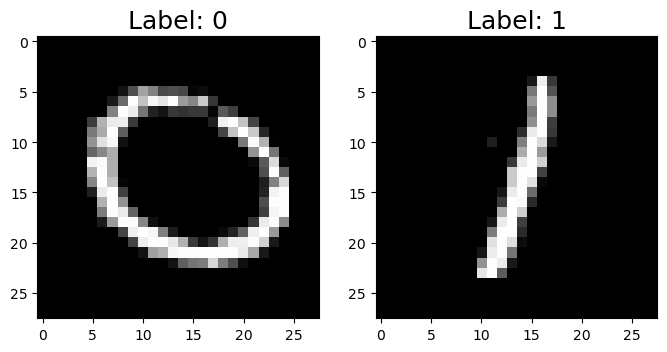

In [6]:
plt.figure(figsize=(8,4))
for index in range(0, 2):

    plt.subplot(1, 2, 1 + index )
    image_values = df.loc[index, pixel_colnames].values
    image_label = df.loc[index, 'label']
    plt.imshow(image_values.reshape(28,28), cmap ='gray')
    plt.title('Label: ' + str(image_label), fontsize = 18)

## Splitting Data into Training and Test Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[pixel_colnames], df['label'], random_state=0)

## Standardize the Data
PCA and logisitic regression are sensitive to the scale of your features. You can standardize your data onto unit scale (mean = 0 and variance = 1) by using Scikit-Learn's `StandardScaler`. 

In [8]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Variable created for demonstational purposes in the notebook
scaledTrainImages = X_train.copy()

## PCA then Logistic Regression

In [10]:
"""
n_components = .90 means that scikit-learn will choose the minimum number 
of principal components such that 90% of the variance is retained.
"""

pca = PCA(n_components = .90)

# Fit PCA on training set only
pca.fit(X_train)

# Apply the mapping (transform) to both the training set and the test set. 
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

print('Number of dimensions before PCA: ' + str(len(pixel_colnames)))
print('Number of dimensions after PCA: ' + str(pca.n_components_))
print('Classification accuracy: ' + str(clf.score(X_test, y_test)))

Number of dimensions before PCA: 784
Number of dimensions after PCA: 104
Classification accuracy: 0.996


## Relationship between Cumulative Explained Variance and Number of Principal Components

Don't worry if you don't understand the code in this section. It is to show the level of redundancy present in multiple dimensions.

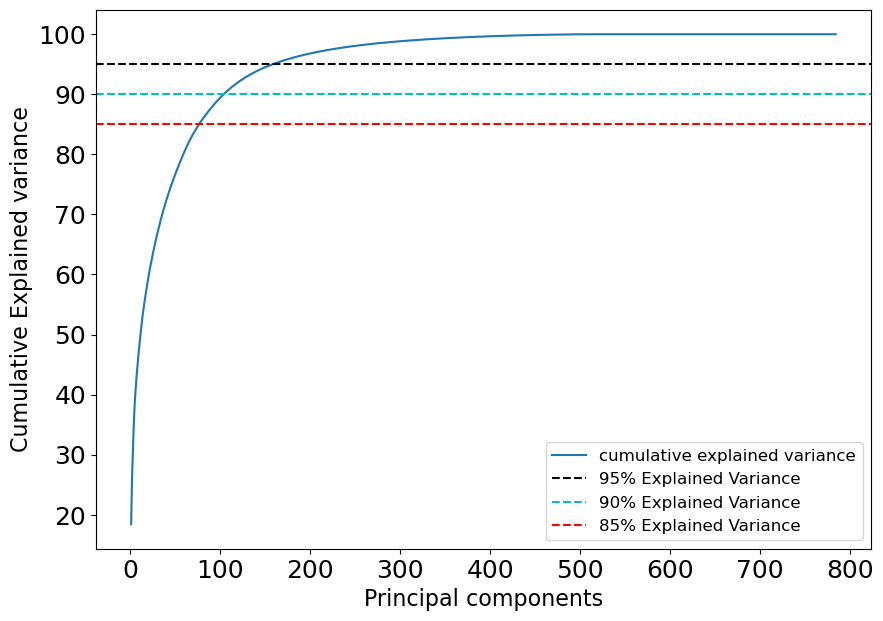

In [11]:
# if n_components is not set, all components are kept (784 in this case)
pca = PCA()

pca.fit(scaledTrainImages)

# Summing explained variance
tot = sum(pca.explained_variance_)

var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 

# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));
ax.tick_params(labelsize = 18)
ax.plot(range(1, 785), cum_var_exp, label='cumulative explained variance')
ax.set_ylabel('Cumulative Explained variance', fontsize = 16)
ax.set_xlabel('Principal components', fontsize = 16)
ax.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
ax.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
ax.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
ax.legend(loc='best', markerscale = 1.0, fontsize = 12)

So that's it, PCA can be used to speed up the fitting of your algorithm. 